## Krotki opis projektu:
Chciałbym sprawdzić zależność zarobków danego filmu zależnie od pozostałych danych (budżetu, glosów itd)

In [2]:
# Importujemy biblioteki
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize']=(14,10)  #ustawiamy podstawową konfigurację wykresów


#### Pobierany dane z https://www.kaggle.com/danielgrijalvas/movies

In [3]:
# Wczytujemy dane
movies_df=pd.read_csv('movies.csv')
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Sprawdzamy czy mamy brakujące dane
movies_df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

### Mamy dość dużo brakujących danych. Jedną opcją jest wypiełnić je, drugą usunąć rekordy z niepełnymi danymi.
Szkoda jednak tracić tak jak w wypatku budżetu prawie 2200 rekordów, więc je wypełnimy średnim budżetem dla wszystkich.
Usuniemy jednak te mniejsze.

In [5]:
# wypełniamy kolumnę budget śradnimi wartościami
movies_df['budget'].fillna(movies_df['budget'].mean(), inplace=True)
movies_df.isna().sum()

name          0
rating       77
genre         0
year          0
released      2
score         3
votes         3
director      0
writer        3
star          1
country       3
budget        0
gross       189
company      17
runtime       4
dtype: int64

In [6]:
# Usuwamy pozostałe aby nie mieć pustych wartości i sprawdzamy
filled_movies_df=movies_df.dropna()
filled_movies_df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [7]:
# Czyszczenie danych - sprzwdzamy typy danych w kolumnach
filled_movies_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# Nie potrzebujemy typu float dla - budżetu(budget), głosów(votes), zarobku(gross), czasu trwania(runtime)
filled_movies_df['budget']=filled_movies_df['budget'].astype('int64')
filled_movies_df['votes']=filled_movies_df['votes'].astype('int64')
filled_movies_df['gross']=filled_movies_df['gross'].astype('int64')
filled_movies_df['runtime']=filled_movies_df['runtime'].astype('int64')

C:\Users\48691\AppData\Local\Temp\ipykernel_15468\504961280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filled_movies_df['budget']=filled_movies_df['budget'].astype('int64')
C:\Users\48691\AppData\Local\Temp\ipykernel_15468\504961280.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filled_movies_df['votes']=filled_movies_df['votes'].astype('int64')
C:\Users\48691\AppData\Local\Temp\ipykernel_15468\504961280.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [9]:
filled_movies_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

### W kolejnym kroku chcę usunę  datę wydania - rok jest zawsze ten sam w wydaje mi się, że łatwiej będzie operować tylko na roku


In [10]:
filled_movies_df=filled_movies_df.drop("released", axis=1)
filled_movies_df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [11]:
# Sprawdzimy czy są jakieś duplikaty (po nazwie), jesli tak to będziemy chcieli je zrzucić
filled_movies_df['name'].drop_duplicates(), filled_movies_df['name']

(0                                          The Shining
 1                                      The Blue Lagoon
 2       Star Wars: Episode V - The Empire Strikes Back
 3                                            Airplane!
 4                                           Caddyshack
                              ...                      
 7651                              The Call of the Wild
 7652                                 The Eight Hundred
 7653                                        The Quarry
 7656                                             Tulsa
 7659                                         I Am Fear
 Name: name, Length: 7267, dtype: object,
 0                                          The Shining
 1                                      The Blue Lagoon
 2       Star Wars: Episode V - The Empire Strikes Back
 3                                            Airplane!
 4                                           Caddyshack
                              ...                      
 7651 

## Nie ma duplikatów, zbiór został wyczyszczony
Chcemy sprawdzić, co ma najwiekszy wpływ na zarobek(gross). Zakładam:
* Budżet(budget) ma duży wpływ
* Firma(company) ma duzy wpływ

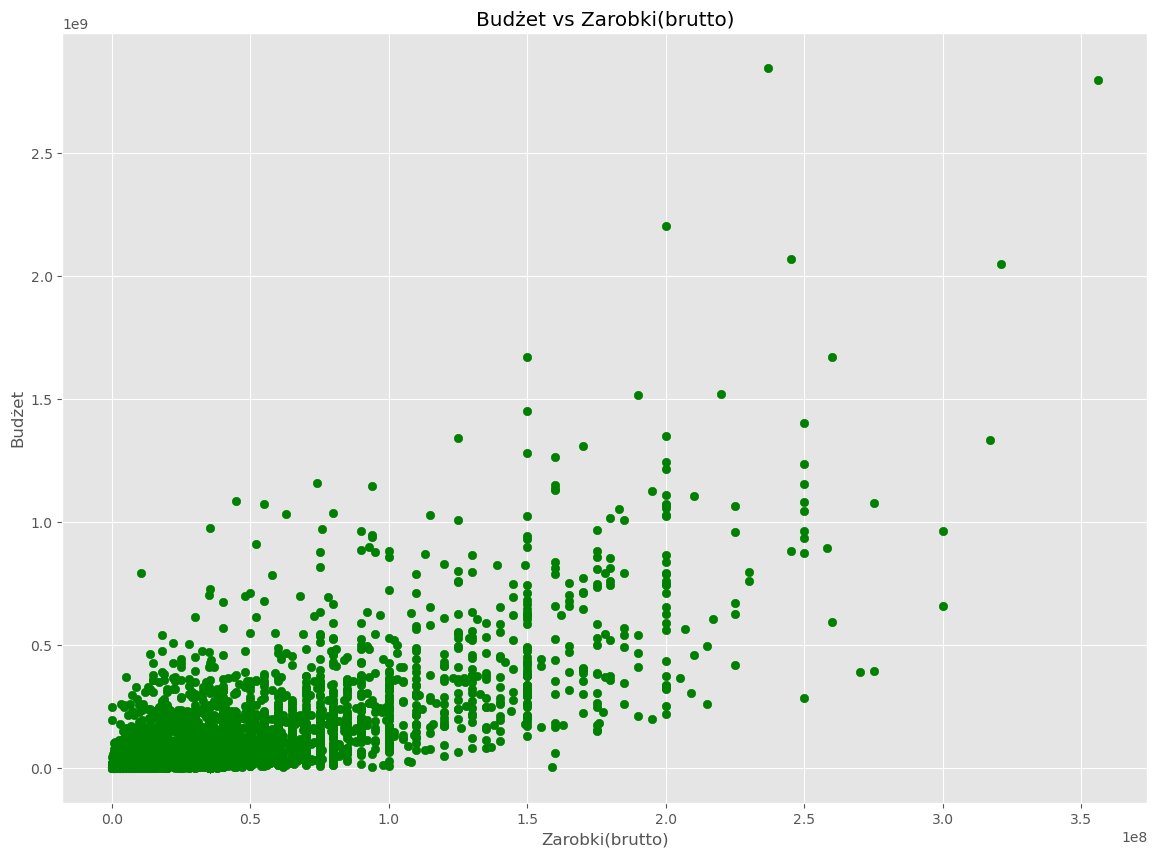

In [12]:
# Utworzymy rozproszony wykres (scatter) dla budżetu i zarobku
colors=['red','blue']
plt.scatter(x=filled_movies_df['budget'], y=filled_movies_df['gross'], c='green')
plt.title('Budżet vs Zarobki(brutto)')
plt.xlabel('Zarobki(brutto)')
plt.ylabel('Budżet')
plt.show()

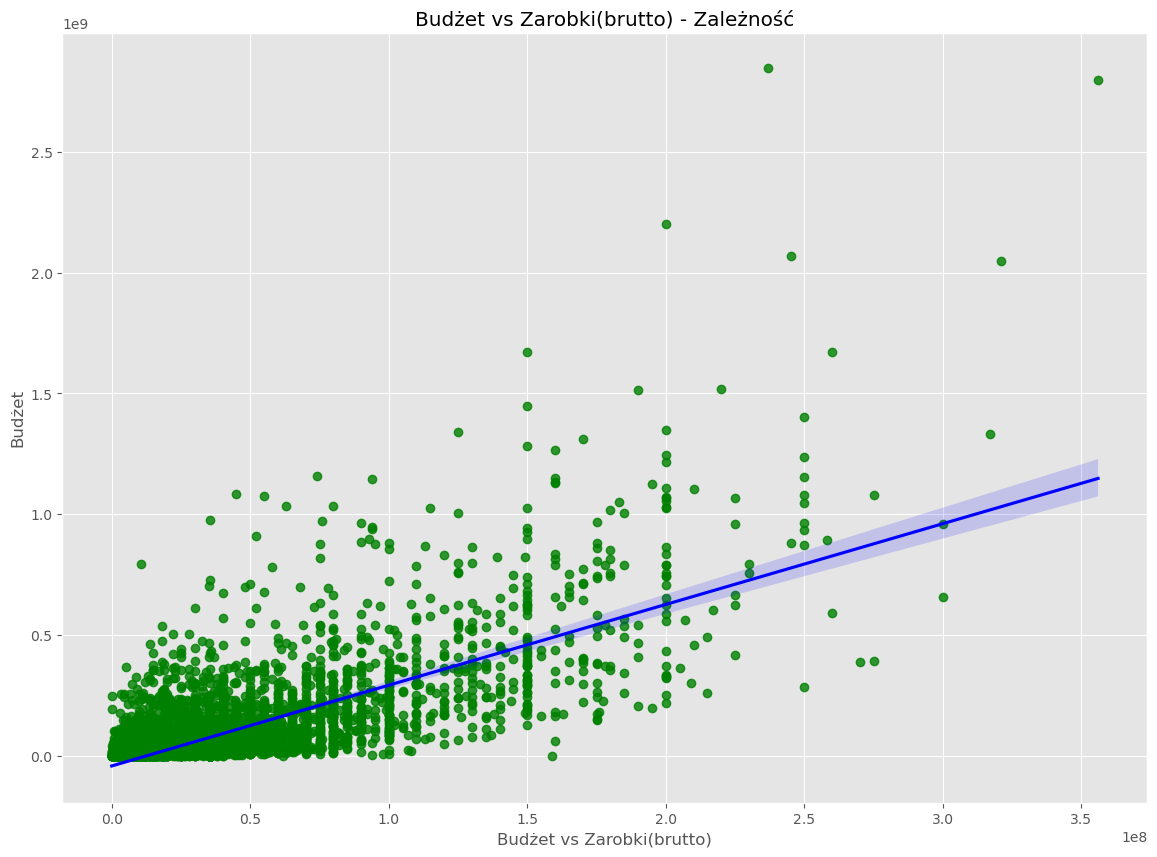

In [13]:
# Wykres z użyciem seaborn

ax = sns.regplot(x='budget',y='gross',data=filled_movies_df, scatter_kws={'color':'green'},line_kws={'color':'blue'});
ax.set(xlabel='Budżet vs Zarobki(brutto)', ylabel='Budżet', title='Budżet vs Zarobki(brutto) - Zależność')
plt.show()

In [14]:
# Sprawdzimy zależności, są rózne metody (pearson, kendall, spearman) - domyślny jest pearson i tak zostawimy
filled_movies_df.corr(numeric_only=True) # Aby nie było ostrzeżenia ustawiamy ręcznie numeric_only na True

,year,score,votes,budget,gross,runtime
year,1.000000,0.093951,0.218941,0.268662,0.258826,0.114237
score,0.093951,1.000000,0.415190,0.061506,0.188071,0.397226
votes,0.218941,0.415190,1.000000,0.420611,0.631110,0.309945
budget,0.268662,0.061506,0.420611,1.000000,0.714607,0.266956
gross,0.258826,0.188071,0.631110,0.714607,1.000000,0.245117
runtime,0.114237,0.397226,0.309945,0.266956,0.245117,1.000000


###### Zachodzi wysoka zależność między budżetem a zarobkiem


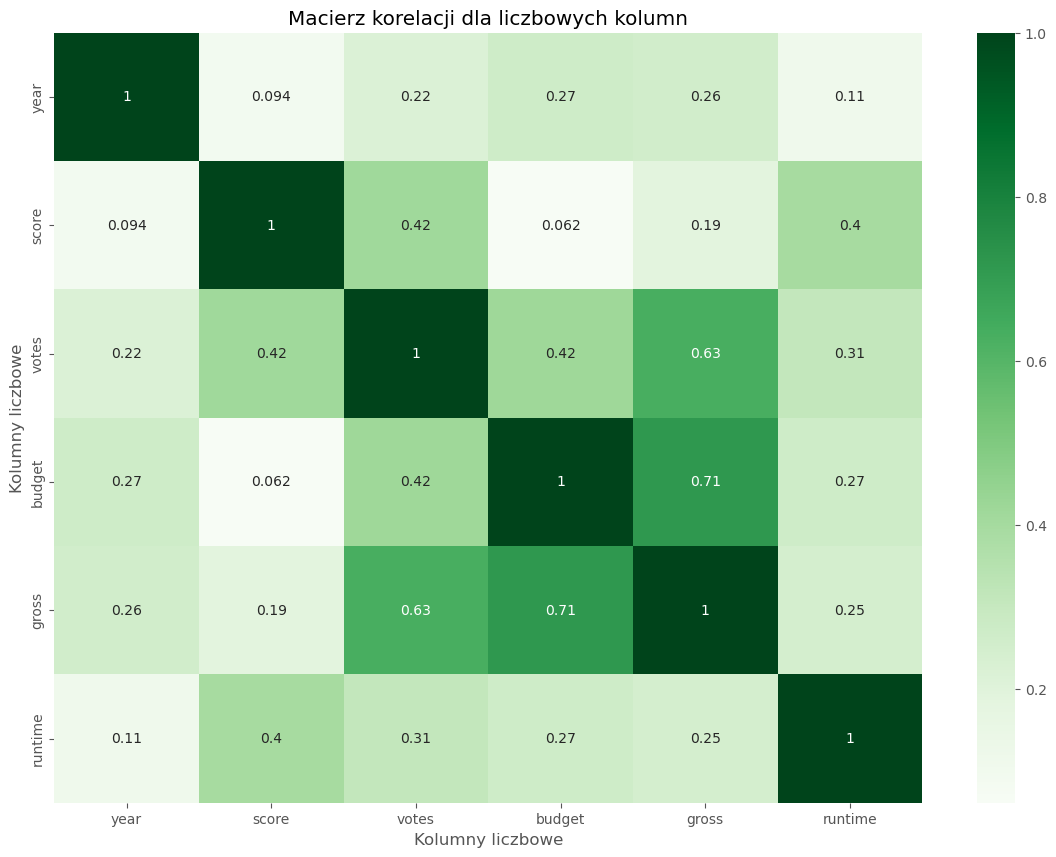

In [15]:
corr_matrix = filled_movies_df.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap="Greens")
plt.title('Macierz korelacji dla liczbowych kolumn')
plt.xlabel('Kolumny liczbowe')
plt.ylabel('Kolumny liczbowe')
plt.show()

### Macież korelacji pokazała nam w tym wypadku, że największą zależność mają: zrobki(brutto) do głosów oraz zrobki(brutto) do budżetu

In [16]:
# Sprawdźmy firmy
filled_movies_df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [17]:
# chcemy ponumerować firmy aby były łatwiejsze do odczytu (Ponumerujemy wszystkie do razu aby móc je wykorzystać)
movies_numerized = filled_movies_df

for col_name in movies_numerized.columns:
    if(movies_numerized[col_name].dtype=='object'):
        movies_numerized[col_name]=movies_numerized[col_name].astype('category')
        movies_numerized[col_name]=movies_numerized[col_name].cat.codes
movies_numerized

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6372,6,6,1980,8.4,927000,2471,3851,979,52,19000000,46998772,2179,146
1,5373,6,1,1980,5.8,65000,2169,1564,306,53,4500000,58853106,686,104
2,4956,4,0,1980,8.7,1200000,1063,2464,1642,53,18000000,538375067,1446,124
3,277,4,4,1980,7.7,221000,1248,1920,2112,53,3500000,83453539,1697,88
4,993,6,4,1980,7.3,108000,1010,499,387,53,6000000,39846344,1665,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,5432,4,1,2020,6.8,42000,438,2838,895,6,135000000,111105497,17,100
7652,5586,3,0,2020,6.8,3700,1048,1602,2645,8,80000000,461421559,350,149
7653,6265,6,5,2020,5.4,2400,2404,3726,2300,53,35589876,3661,1786,98
7656,6792,5,4,2020,5.0,294,2399,3719,2241,53,35589876,413378,1788,120


In [18]:
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


W porównaniu widac, że zabieg zadziałał

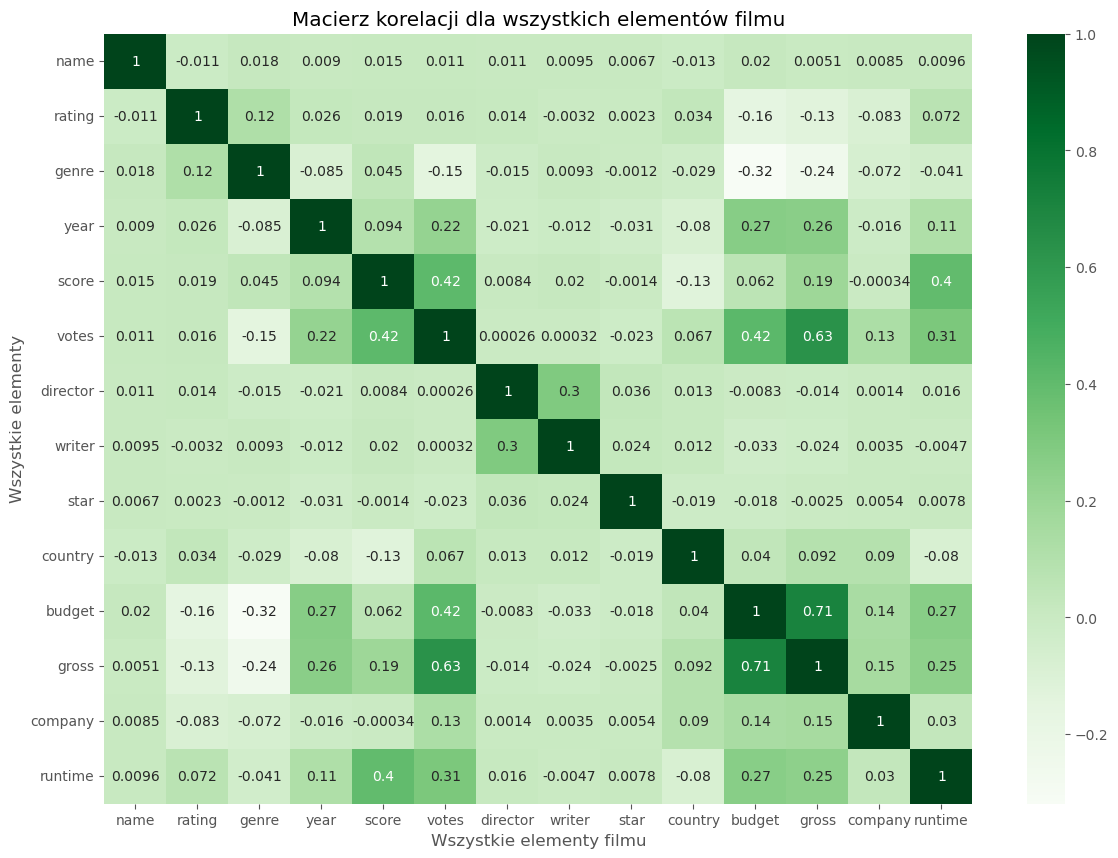

In [19]:
corr_matrix = movies_numerized.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap="Greens")

plt.title('Macierz korelacji dla wszystkich elementów filmu')
plt.xlabel('Wszystkie elementy filmu')
plt.ylabel('Wszystkie elementy')
plt.show()

### Macież korelacji przy wszystkich elementach pokazala, że firma, ma mały wpływ na zarobek, główny wpływ całościowo, mają: 
* budżet
* głosy